In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load the dataset
df = pd.read_csv('train.csv')

In [3]:
# Step 3: Handle missing values
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Drop rows where 'Embarked' is missing
df = df.dropna(subset=['Embarked'])

In [5]:
# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [6]:
# Fill missing 'Cabin' values with 'Unknown'
df['Cabin'].fillna('Unknown', inplace=True)

In [7]:
# Verify that there are no missing values left
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [8]:
# Step 4: Create new columns
# Create a new column 'FamilySize' = SibSp + Parch + 1 (self)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [9]:
# Create a new column 'IsAlone' (1 if FamilySize == 1, else 0)
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [10]:
# Create a new column 'Title' extracted from the 'Name'
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [11]:
# Step 5: Filter data
# Filter data to only include passengers older than 18 and in class 1 or 2
filtered_df = df[(df['Age'] > 18) & (df['Pclass'].isin([1, 2]))]

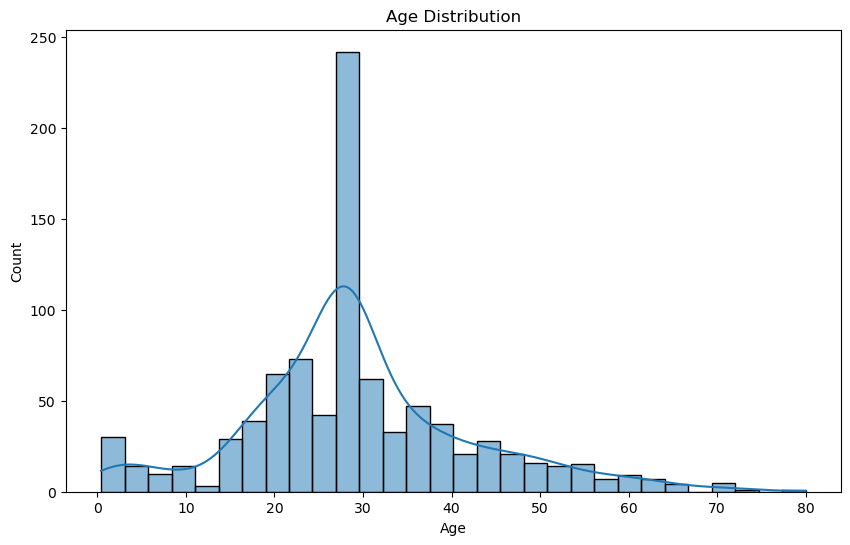

In [12]:
# Step 6: Visualize the dataset
# 1. Distribution of 'Age'
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

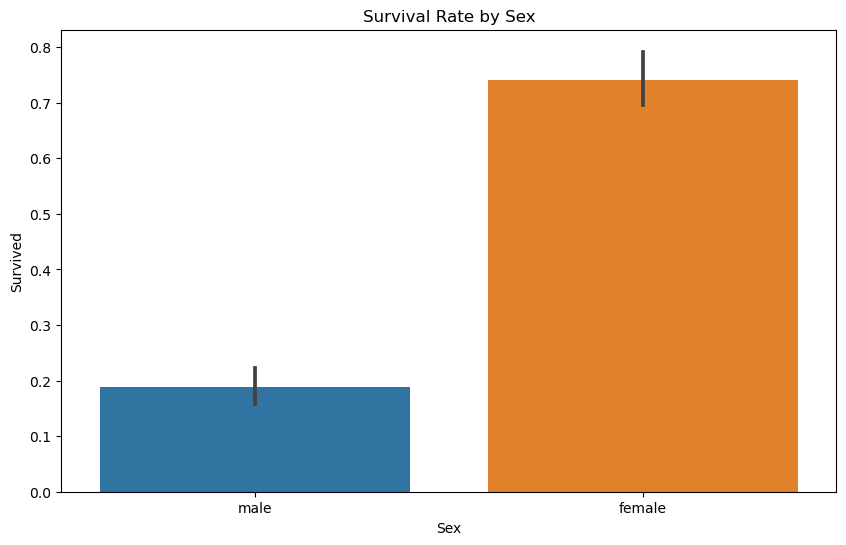

In [13]:
# 2. Survival rate by 'Sex'
plt.figure(figsize=(10,6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

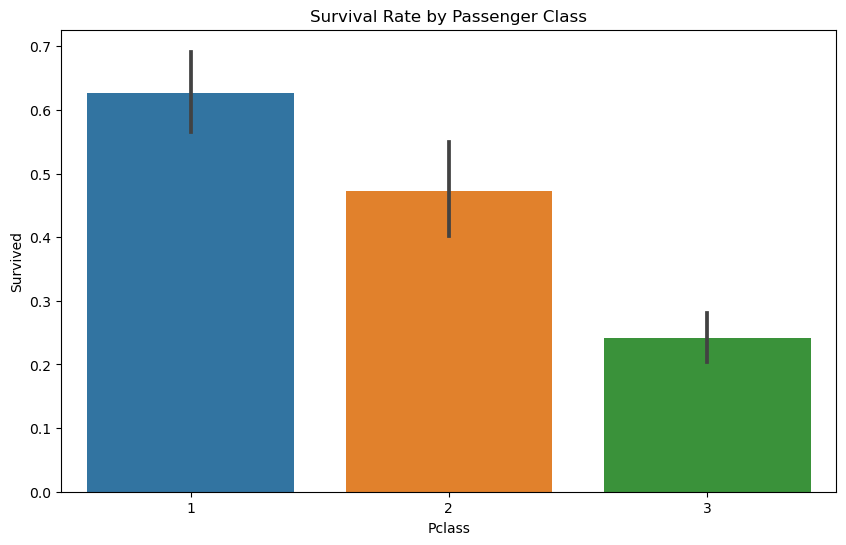

In [14]:
# 3. Survival rate by 'Pclass'
plt.figure(figsize=(10,6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

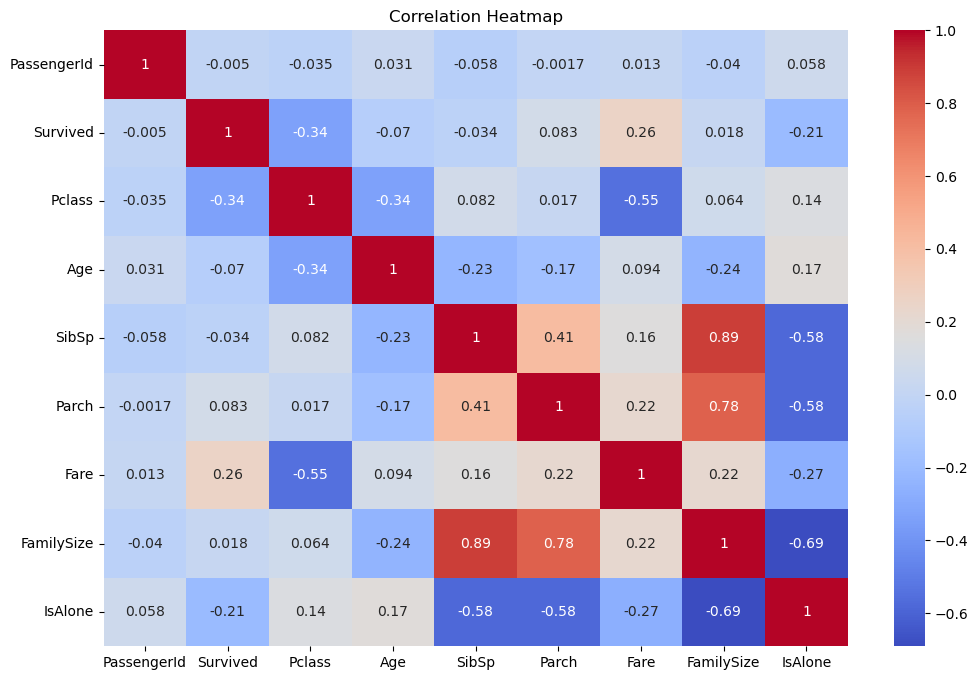

In [15]:
# 4. Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

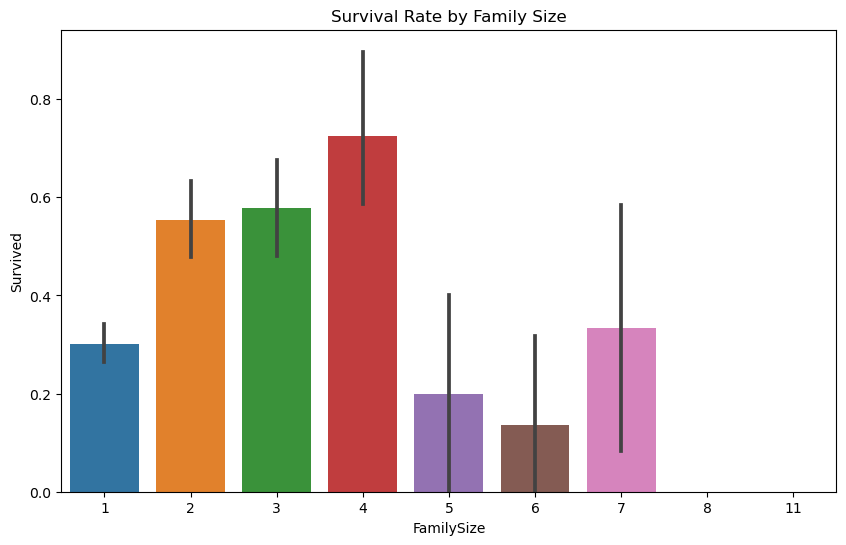

In [16]:
# 5. Family Size impact on survival
plt.figure(figsize=(10,6))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()
